In [4]:
# Here we try to see if there is any corrolation with interface mutations and larger absolute changes in ACE2 binding.

import pandas as pd
#! pip3 install --upgrade pandas
import numpy as np
import matplotlib.pyplot as plt
# !pip install nglview
# import xpdb  # this is the module described below
from Bio.PDB import *
#import nglview as nv
import ipywidgets
import os
from matplotlib import cm
from scipy.ndimage.filters import gaussian_filter
from matplotlib.ticker import NullFormatter
import difflib
from Bio import SeqIO
from pysam import FastaFile
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
from varname import varname
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches

In [5]:
variant_scores_path = "../SARS-CoV-2-RBD_DMS_Omicron/results/final_variant_scores/final_variant_scores.csv"

variants_names = {
    "Omicron_BA1":"Omicron_BA1",
    "Omicron_BA2":"Omicron_BA2",
    "Wuhan-Hu-1_v2": "Wuhan-Hu-1",
    "N501Y": "Alpha", 
    "Beta": "Beta",
    "Delta": "Delta",
    "E484K": "Eta",
}

# Expression and Binding scores per variant background -- for the heatmap plots
scores_df = (
    pd.read_csv(variant_scores_path)
        .rename(columns = {"position":"site",
                           "delta_expr":"RBD expression", # rename for the selection menus 
                           "delta_bind":"ACE2 binding"    # rename for the selection menus 
                          })
        .replace({"target":variants_names})
)

wuhan = scores_df.loc[scores_df["target"] == "Wuhan-Hu-1"]
Beta = scores_df.loc[scores_df["target"] == "Beta"]
Alpha = scores_df.loc[scores_df["target"] == "Alpha"]
Delta = scores_df.loc[scores_df["target"] == "Delta"]
Eta = scores_df.loc[scores_df["target"] == "Eta"]
omicronBA1 = scores_df.loc[scores_df["target"] == "Omicron_BA1"]
omicronBA2 = scores_df.loc[scores_df["target"] == "Omicron_BA2"]

binding_interface = pd.read_csv('binding_interface.txt', sep=" ", header=None)
binding_positions = np.array(binding_interface)[:,1]


Text(0.9, 0.5, 'Omicron BA2')

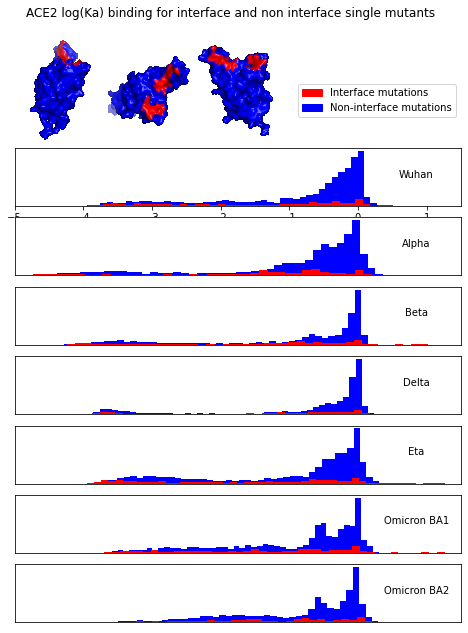

In [6]:
from cProfile import label

def interface_classing(variant,title):
    interface = variant[variant["site"].isin(binding_positions)]
    non_interface = variant[~variant["site"].isin(binding_positions)]
    
    interface_expr = interface["RBD expression"].values
    non_interface_expr = non_interface["RBD expression"].values
           
    interface_ka = interface["ACE2 binding"].values
    non_interface_ka = non_interface["ACE2 binding"].values
    
    return interface_expr, non_interface_expr , interface_ka , non_interface_ka
    
fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(8,1,figsize=(8,10))

# Align all plots.. 
# Add labels..
im = mpimg.imread('../pymol_images/inter3.png')
imagebox = OffsetImage(im, zoom=0.10)
ab = AnnotationBbox(imagebox, (0.1, 0.8),bboxprops=dict(edgecolor="white"))
ax0.add_artist(ab)

im = mpimg.imread('../pymol_images/inter1.png')
imagebox = OffsetImage(im, zoom=0.10)
ab = AnnotationBbox(imagebox, (0.3, 0.8),bboxprops=dict(edgecolor="white"))
ax0.add_artist(ab)

im = mpimg.imread('../pymol_images/inter2.png')
imagebox = OffsetImage(im, zoom=0.10)
ab = AnnotationBbox(imagebox, (0.5, 0.8),bboxprops=dict(edgecolor="white"))
ax0.add_artist(ab)

ax0.axis('off')

fig.suptitle("ACE2 log(Ka) binding for interface and non interface single mutants")

red_patch = mpatches.Patch(color='red', label='Interface mutations')
blue_patch = mpatches.Patch(color='blue', label='Non-interface mutations')

ax0.legend(handles=[red_patch,blue_patch])


interface_expr, non_interface_expr , interface_ka , non_interface_ka = interface_classing(wuhan,"Wuhan")
ax1.hist(non_interface_ka,alpha=1,bins=50,color="blue")
ax1.hist(interface_ka,alpha=1,bins=50,color="red")
ax1.set_xlim(-5,1.5)
ax1.set_yticklabels([])
ax1.set_yticks([])
ax1.text(.9,.5,'Wuhan',
        horizontalalignment='center',
        transform=ax1.transAxes)

interface_expr, non_interface_expr , interface_ka , non_interface_ka = interface_classing(Alpha,"Alpha")
ax2.hist(non_interface_ka,bins=50,color="blue")
ax2.hist(interface_ka,bins=50,color="red")
ax2.set_xlim(-5,1.5)
ax2.set_xticklabels([])
ax2.set_xticks([])
ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_yticks([])
ax2.text(.9,.5,'Alpha',
        horizontalalignment='center',
        transform=ax2.transAxes)

interface_expr, non_interface_expr , interface_ka , non_interface_ka = interface_classing(Beta,"beta")
ax3.hist(non_interface_ka,bins=50,color="blue")
ax3.hist(interface_ka,bins=50,color="red")
ax3.set_xlim(-5,1.5)
ax3.set_xticklabels([])
ax3.set_xticks([])
ax3.set_yticklabels([])
ax3.set_yticks([])
ax3.text(.9,.5,'Beta',
        horizontalalignment='center',
        transform=ax3.transAxes)

interface_expr, non_interface_expr , interface_ka , non_interface_ka = interface_classing(Delta,"delta")
ax4.hist(non_interface_ka,bins=50,color="blue")
ax4.hist(interface_ka,bins=50,color="red")
ax4.set_xlim(-5,1.5)
ax4.set_xticklabels([])
ax4.set_xticks([])
ax4.set_yticklabels([])
ax4.set_yticks([])
ax4.text(.9,.5,'Delta',
        horizontalalignment='center',
        transform=ax4.transAxes)


interface_expr, non_interface_expr , interface_ka , non_interface_ka = interface_classing(Eta,"Eta")
ax5.hist(non_interface_ka,bins=50,label="Non-Interface",color="blue")
ax5.hist(interface_ka,bins=50,label="Interface",color="red")
ax5.set_xlim(-5,1.5)
ax5.set_xticklabels([])
ax5.set_xticks([])
ax5.set_yticklabels([])
ax5.set_yticks([])
ax5.text(.9,.5,'Eta',
        horizontalalignment='center',
        transform=ax5.transAxes)




interface_expr, non_interface_expr , interface_ka , non_interface_ka = interface_classing(omicronBA1,"omicronBA1")
ax6.hist(non_interface_ka,bins=50,label="Non-Interface",color="blue")
ax6.hist(interface_ka,bins=50,label="Interface",color="red")
ax6.set_xlim(-5,1.5)
ax6.set_xticklabels([])
ax6.set_xticks([])
ax6.set_yticklabels([])
ax6.set_yticks([])
ax6.text(.9,.5,'Omicron BA1',
        horizontalalignment='center',
        transform=ax6.transAxes)

interface_expr, non_interface_expr , interface_ka , non_interface_ka = interface_classing(omicronBA2,"omicronBA2")
ax7.hist(non_interface_ka,bins=50,label="Non-Interface",color="blue")
ax7.hist(interface_ka,bins=50,label="Interface",color="red")
ax7.set_xlim(-5,1.5)
ax7.set_xticklabels([])
ax7.set_xticks([])
ax7.set_yticklabels([])
ax7.set_yticks([])
ax7.text(.9,.5,'Omicron BA2',
        horizontalalignment='center',
        transform=ax7.transAxes)
